In [4]:
from sklearn.datasets import load_digits
load_digits()

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1) , dtype=bool)

digits = load_digits()
digits.target == 7

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_13120\757671313.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


array([False, False, False, ..., False, False, False])

In [6]:
y = (digits.target == 7).astype(int)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)
print('레이블 테스트 세트 크기:',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print(f'모든 예측을 0으로 하여도 정확도는: {accuracy_score(y_test, fakepred):.3f}')

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


#### sklearn.metrics.confusion_matrix

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_test, fakepred)

0.9

In [9]:
precision_score(y_test, fakepred)

C:\Users\SAMSUNG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [10]:
recall_score(y_test, fakepred)

0.0

In [11]:
import pandas as pd

titanic_train_df = pd.read_csv('C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\titanic_train.csv')
titanic_test_df = pd.read_csv('C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\titanic_test.csv')
titanic_train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
mean = titanic_train_df['Age'].mean()
titanic_train_df['Age'] = titanic_train_df['Age'].fillna(mean)
titanic_test_df['Age'] = titanic_test_df['Age'].fillna(mean)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(titanic_train_df['Sex'])

titanic_train_df['Sex']= le.transform(titanic_train_df['Sex'])
titanic_test_df['Sex']= le.transform(titanic_test_df['Sex'])

In [14]:
gender_submission = pd.read_csv('./datasets/titanic_gender_submission.csv')
X_train_df = titanic_train_df[['Pclass', 'Sex','Age']]
y_train = titanic_train_df['Survived']

X_test_df = titanic_test_df[['Pclass', 'Sex','Age']]
y_test = gender_submission['Survived']

In [15]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

clf = LogisticRegression(random_state=0)
clf.fit(X_train_df, y_train)

pred = clf.predict(X_test_df)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, pred)

0.9569377990430622

In [17]:
precision_score(y_test, pred)

0.935064935064935

In [18]:
recall_score(y_test, pred)

0.9473684210526315

In [19]:
f1_score(y_test, pred)

0.9411764705882353

In [42]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [41]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [20]:
pred_proba = clf.predict_proba(X_test_df)

In [21]:
pred_proba

array([[0.92241338, 0.07758662],
       [0.59082243, 0.40917757],
       [0.90386809, 0.09613191],
       [0.90280261, 0.09719739],
       [0.38807098, 0.61192902],
       [0.85825931, 0.14174069],
       [0.45211376, 0.54788624],
       [0.74195188, 0.25804812],
       [0.35730623, 0.64269377],
       [0.88404333, 0.11595667],
       [0.91032363, 0.08967637],
       [0.63983861, 0.36016139],
       [0.06285919, 0.93714081],
       [0.90669005, 0.09330995],
       [0.12875029, 0.87124971],
       [0.178094  , 0.821906  ],
       [0.79451262, 0.20548738],
       [0.88404333, 0.11595667],
       [0.42779109, 0.57220891],
       [0.57481962, 0.42518038],
       [0.70492663, 0.29507337],
       [0.83703742, 0.16296258],
       [0.07716841, 0.92283159],
       [0.43828367, 0.56171633],
       [0.13248745, 0.86751255],
       [0.95192532, 0.04807468],
       [0.06094809, 0.93905191],
       [0.88900889, 0.11099111],
       [0.60111302, 0.39888698],
       [0.91032363, 0.08967637],
       [0.

In [26]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,confusion_matrix
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율: {recall:.4f} , f1 : {f1score:.4f}')


In [27]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,confusion_matrix
thresholds = [0.4,0.45,0.50,0.55,0.60]



def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.4
오차행렬
[[237  29]
 [  0 152]]
정확도:0.9306, 정밀도:0.8398, 재현율: 1.0000 , f1 : 0.9129
임계값 : 0.45
오차행렬
[[242  24]
 [  3 149]]
정확도:0.9354, 정밀도:0.8613, 재현율: 0.9803 , f1 : 0.9169
임계값 : 0.5
오차행렬
[[256  10]
 [  8 144]]
정확도:0.9569, 정밀도:0.9351, 재현율: 0.9474 , f1 : 0.9412
임계값 : 0.55
오차행렬
[[262   4]
 [ 13 139]]
정확도:0.9593, 정밀도:0.9720, 재현율: 0.9145 , f1 : 0.9424
임계값 : 0.6
오차행렬
[[264   2]
 [ 44 108]]
정확도:0.8900, 정밀도:0.9818, 재현율: 0.7105 , f1 : 0.8244


In [28]:
## sklearn.metrics.precision_recall_curve

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

In [30]:
precision, recall, thresholds

(array([0.36363636, 0.36450839, 0.36538462, 0.36626506, 0.36714976,
        0.36803874, 0.36982968, 0.37163814, 0.37254902, 0.37346437,
        0.37530864, 0.37623762, 0.37717122, 0.37905237, 0.38      ,
        0.38383838, 0.3857868 , 0.44186047, 0.4457478 , 0.44705882,
        0.45103858, 0.45238095, 0.4592145 , 0.46060606, 0.46200608,
        0.46769231, 0.47648903, 0.48717949, 0.49190939, 0.49350649,
        0.49511401, 0.50165017, 0.51877133, 0.52413793, 0.52595156,
        0.53333333, 0.53900709, 0.54092527, 0.54285714, 0.54480287,
        0.54676259, 0.55072464, 0.55272727, 0.55474453, 0.55677656,
        0.55882353, 0.56088561, 0.56296296, 0.56716418, 0.56928839,
        0.57358491, 0.57794677, 0.58461538, 0.58687259, 0.58914729,
        0.59143969, 0.59375   , 0.59607843, 0.5984252 , 0.60079051,
        0.6031746 , 0.60557769, 0.61044177, 0.62295082, 0.63333333,
        0.63598326, 0.64135021, 0.64680851, 0.65236052, 0.65517241,
        0.66666667, 0.67555556, 0.68468468, 0.69

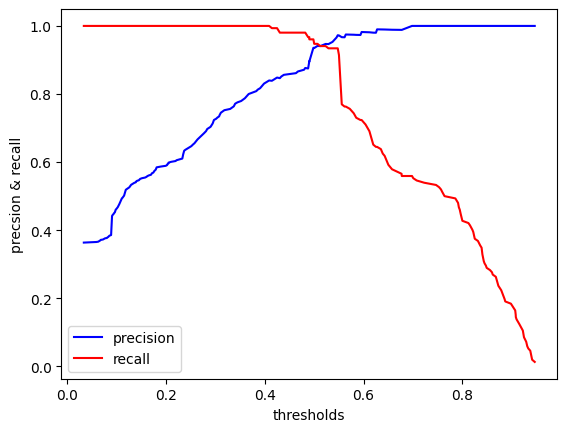

In [33]:
## matplotlib.pyplot.plot
import matplotlib.pyplot as plt

plt.plot(thresholds , precision[:-1] , c='blue' , label="precision")
plt.plot(thresholds , recall[:-1] , c='red', label="recall")
plt.xlabel("thresholds")
plt.ylabel("precsion & recall")
plt.legend()
plt.show()


In [37]:
## sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve
roc_curve(y_test, pred_proba[:,1])
fprs, tprs, thresholds =roc_curve(y_test, pred_proba[: , 1])

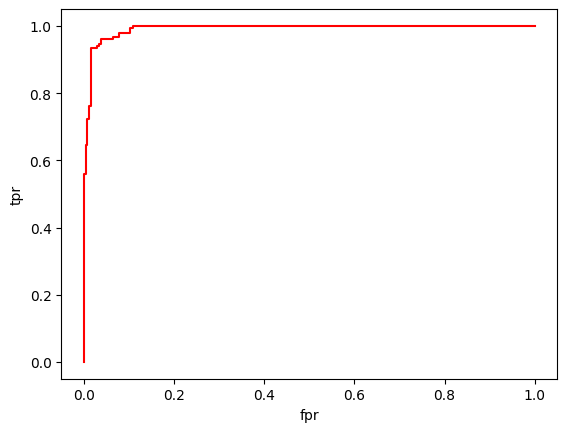

In [38]:
import matplotlib.pyplot as plt

plt.plot(fprs ,tprs ,  color='red')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [40]:
## sklearn.metrics.roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_proba[: , 1])

0.9916402849228334